In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

# 기본모델 : DecisionTree - 성능 기준
# 배깅, 부스팅, 랜덤배깅 모델 튜닝

클래스가 타깃변수
## 분석의 목적 : 학력, 교육연수, 혼인 상태, 직업 정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지

age: 나이
workclass: 직업군
education: 교육 수준
education-num: 교육 연수
marital-status: 결혼 상태
occupation: 직업
relationship: 가족 관계
race: 인종
sex: 성별
capital-gain: 자본 소득
capital-loss: 자본 손실
hours-per-week: 주당 근로 시간
native-country: 출신 국가
class: 소득 등급

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 1. 결측값 처리

In [5]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
# 결측값 비율
data.isna().mean() * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [7]:
# 공백 주의
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [8]:
# 공백 포함되어 있음
# 나이가 20세 미만
# 미혼모, 미혼부
# 별거중, 멀리 떨어져 있음

data[data['workclass'] == ' Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [9]:
data.loc[data['workclass'] == ' Never-worked', 'occupation'] = 'part-timer'

In [10]:
data[data['workclass'] == ' Without-pay']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2957,19,Without-pay,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K
3177,74,Without-pay,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
6466,51,Without-pay,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
8903,64,Without-pay,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,>50K
10647,50,Without-pay,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,0,1887,40,United-States,>50K
13836,39,Without-pay,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
14034,27,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Female,0,0,40,United-States,<=50K
18182,65,Without-pay,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
25538,19,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
31814,21,Without-pay,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K


In [11]:
data.loc[data['workclass'].isna() == True, 'workclass'] = 'part-time'

In [12]:
data['occupation'] = data['occupation'].fillna('part-time')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [14]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47985 non-null  object
 2   education       47985 non-null  object
 3   education-num   47985 non-null  int64 
 4   marital-status  47985 non-null  object
 5   occupation      47985 non-null  object
 6   relationship    47985 non-null  object
 7   race            47985 non-null  object
 8   sex             47985 non-null  object
 9   capital-gain    47985 non-null  int64 
 10  capital-loss    47985 non-null  int64 
 11  hours-per-week  47985 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           47985 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.5+ MB


### 카테고리 변수들의 자료에 공백이 있어 공백을 제거해주는 작업해줘야함

In [16]:
cols = list(data.columns)
cols

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [17]:
# 데이터 타입이 오브젝트인지 확인
data['workclass'].apply(lambda x: x.strip())

0             Private
1             Private
2           Local-gov
3             Private
4           part-time
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 47985, dtype: object

In [18]:
for col in cols:
    if data[col].dtype =='O':
        data[col] = data[col].apply(lambda x: x.strip())

In [19]:
for col in cols:
    if data[col].dtype =='O':
        print(col,data[col].unique())

workclass ['Private' 'Local-gov' 'part-time' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'part-time'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces' 'part-timer']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
sex ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'G

# 이상치 탐지

In [20]:
search_outlier = data.describe()

In [21]:
search_outlier.loc['75%', :] + (1.5*(search_outlier.loc['75%', :]- search_outlier.loc['25%', :]))

age               78.0
education-num     16.5
capital-gain       0.0
capital-loss       0.0
hours-per-week    52.5
dtype: float64

In [22]:
search_outlier

,age,education-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,10.067229,1067.032093,87.370553,40.411483
std,13.729622,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


* capital-gain, capital-loss 히스토그램 그리기
* hours-per-week 이상값을 가진 데이터 찾아보기 

In [23]:
len(data[data['capital-gain'] > 0]) / len(data) * 100

8.254662915494425

In [24]:
len(data[data['capital-loss'] > 0]) / len(data) * 100

4.666041471293112

<Axes: xlabel='capital-gain', ylabel='Count'>

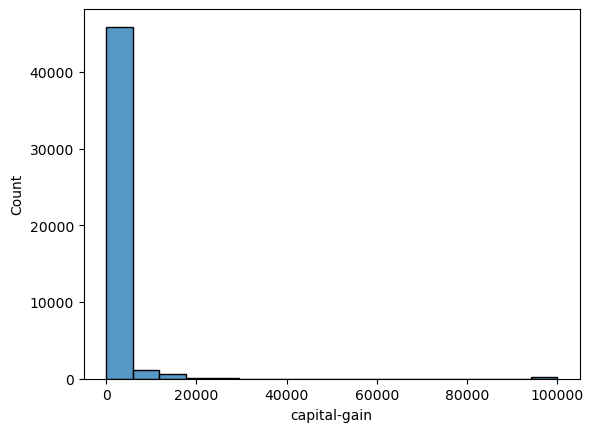

In [25]:
sns.histplot(data['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Count'>

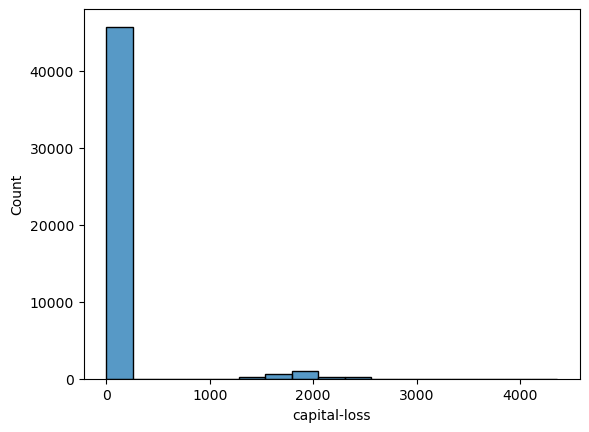

In [26]:
sns.histplot(data['capital-loss'])

In [27]:
# 0을 기준으로 나눔
data['capital-gain_yes'] = data['capital-gain'].apply(lambda x: 1 if x>0 else 0)

In [28]:
# 0을 기준으로 나눔
data['capital-loss_yes'] = data['capital-loss'].apply(lambda x: 1 if x>0 else 0)

In [29]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0
4,18,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K,0,0


<Axes: xlabel='capital-gain_yes,class'>

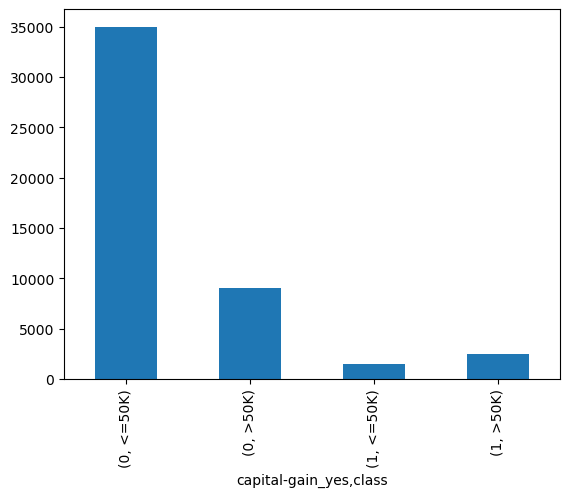

In [30]:
data[['capital-gain_yes', 'class']].groupby('capital-gain_yes').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='capital-loss_yes,class'>

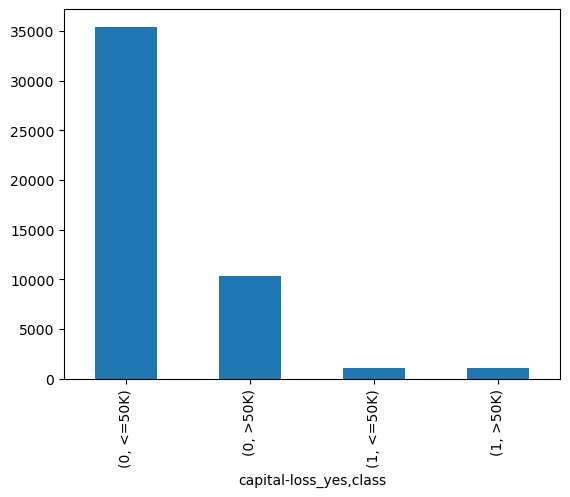

In [31]:
data[['capital-loss_yes', 'class']].groupby('capital-loss_yes').value_counts(sort=False).plot(kind='bar')

In [32]:
data['capital-gain'].describe()

count    47985.000000
mean      1067.032093
std       7373.256663
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [33]:
data[data['capital-gain'] > 1067.032093]['class'].value_counts()

class
>50K     2439
<=50K    1405
Name: count, dtype: int64

In [34]:
data[data['capital-gain'] < 1067.032093]['class'].value_counts()

class
<=50K    35113
>50K      9028
Name: count, dtype: int64

자산이 증가하면 연봉이 5만 달러 이상일 가능성이 높은 편이다.

In [35]:
data['capital-loss'].describe()

count    47985.000000
mean        87.370553
std        402.681462
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [36]:
data[data['capital-loss'] > 87.370553]['class'].value_counts()

class
>50K     1120
<=50K    1119
Name: count, dtype: int64

In [37]:
data[data['capital-loss'] < 87.370553]['class'].value_counts()

class
<=50K    35399
>50K     10347
Name: count, dtype: int64

In [38]:
data[data['hours-per-week'] > 52.5]['class'].value_counts()

class
<=50K    3002
>50K     2109
Name: count, dtype: int64

<Axes: xlabel='hours-per-week', ylabel='Count'>

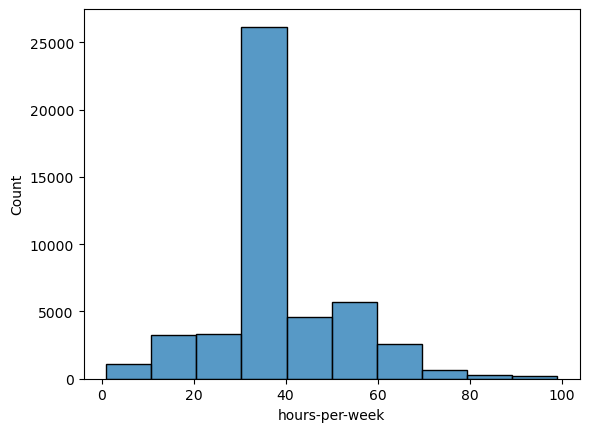

In [39]:
sns.histplot(data['hours-per-week'], bins=10)

<Axes: xlabel='age', ylabel='Count'>

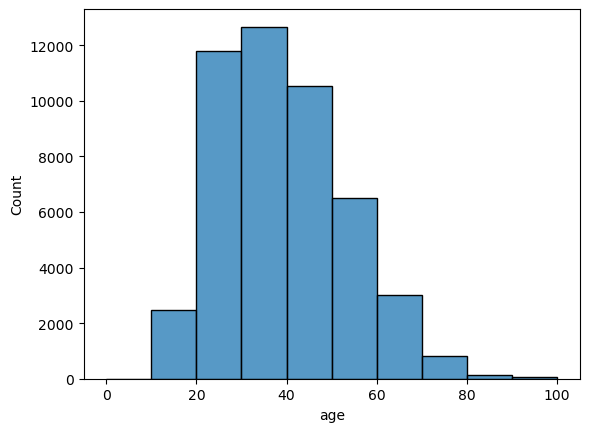

In [40]:
sns.histplot(data['age'], bins=[0,10,20,30,40,50,60,70,80,90,100])

In [41]:
# 나이 데이터를 연령대별로 그룹화
bins=[0,10,20,30,40,50,60,70,80,90,100]
labels = ['under10s', '10s','20s','30s','40s','50s','60s','70s','80s','90s']
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [42]:
data['age']

0        20s
1        30s
2        20s
3        40s
4        10s
        ... 
48837    20s
48838    40s
48839    50s
48840    20s
48841    50s
Name: age, Length: 47985, dtype: category
Categories (10, object): ['under10s' < '10s' < '20s' < '30s' ... '60s' < '70s' < '80s' < '90s']

In [43]:
age_class = data[['age', 'class']].groupby('age').describe()

C:\Users\5-07\AppData\Local\Temp\ipykernel_6404\2018198918.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class = data[['age', 'class']].groupby('age').describe()


In [44]:
print(type(age_class))

<class 'pandas.core.frame.DataFrame'>


In [45]:
age_class

class                     
          count unique    top   freq
age                                 
under10s      0      0    NaN    NaN
10s        2490      2  <=50K   2487
20s       11802      2  <=50K  11073
30s       12666      2  <=50K   9271
40s       10524      2  <=50K   6613
50s        6513      2  <=50K   4048
60s        2999      2  <=50K   2210
70s         810      2  <=50K    664
80s         127      2  <=50K    111
90s          54      2  <=50K     41

In [46]:
age_class.columns

MultiIndex([('class',  'count'),
            ('class', 'unique'),
            ('class',    'top'),
            ('class',   'freq')],
           )

In [47]:
age_class_ratio = 100 - (age_class[('class', 'freq')] / age_class[('class', 'count')] * 100)

In [48]:
age_class_ratio['10s']

0.12048192771084132

In [49]:
age_class_ratio['under10s'] = 0

In [50]:
age_class_ratio

age
under10s            0
10s          0.120482
20s          6.176919
30s         26.804042
40s         37.162676
50s         37.847382
60s          26.30877
70s         18.024691
80s         12.598425
90s         24.074074
dtype: object

In [51]:
age_class_idx = list(age_class_ratio.index)

In [52]:
data['over50byage'] = data['age'].apply(lambda x: age_class_ratio[x])

In [53]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676
4,10s,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482


In [54]:
data['workclass'].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
part-time            2753
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [55]:
data.groupby('workclass')['class'].describe()

,count,unique,top,freq
workclass,,,,
Federal-gov,1406,2,<=50K,857
Local-gov,3100,2,<=50K,2185
Never-worked,10,1,<=50K,10
Private,33307,2,<=50K,26056
Self-emp-inc,1646,2,>50K,912
Self-emp-not-inc,3796,2,<=50K,2737
State-gov,1946,2,<=50K,1426
Without-pay,21,2,<=50K,19
part-time,2753,2,<=50K,2494


In [56]:
class_ratio_by_workclass = data.groupby('workclass')['class'].describe()
class_ratio_by_workclass

,count,unique,top,freq
workclass,,,,
Federal-gov,1406,2,<=50K,857
Local-gov,3100,2,<=50K,2185
Never-worked,10,1,<=50K,10
Private,33307,2,<=50K,26056
Self-emp-inc,1646,2,>50K,912
Self-emp-not-inc,3796,2,<=50K,2737
State-gov,1946,2,<=50K,1426
Without-pay,21,2,<=50K,19
part-time,2753,2,<=50K,2494


In [57]:
class_ratio_by_workclass.columns

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [58]:
over50byworkclass = 100 - (class_ratio_by_workclass['freq']/class_ratio_by_workclass['count'] * 100)
over50byworkclass

workclass
Federal-gov         39.046942
Local-gov           29.516129
Never-worked              0.0
Private             21.770198
Self-emp-inc        44.592953
Self-emp-not-inc    27.897787
State-gov            26.72148
Without-pay           9.52381
part-time            9.407919
dtype: object

In [59]:
over50byworkclass['Self-emp-inc'] = 100 - over50byworkclass['Self-emp-inc']
over50byworkclass

workclass
Federal-gov         39.046942
Local-gov           29.516129
Never-worked              0.0
Private             21.770198
Self-emp-inc        55.407047
Self-emp-not-inc    27.897787
State-gov            26.72148
Without-pay           9.52381
part-time            9.407919
dtype: object

In [60]:
data['over50byworkclass'] = data['workclass'].apply(lambda x: over50byworkclass[x])

In [61]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198
4,10s,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919


In [62]:
data['education'].value_counts()

education
HS-grad         15586
Some-college    10723
Bachelors        7815
Masters          2579
Assoc-voc        2038
11th             1800
Assoc-acdm       1579
10th             1372
7th-8th           931
Prof-school       808
9th               745
12th              635
Doctorate         562
5th-6th           490
1st-4th           240
Preschool          82
Name: count, dtype: int64

In [63]:
data.groupby('education')['class'].describe()

,count,unique,top,freq
education,,,,
10th,1372,2,<=50K,1286
11th,1800,2,<=50K,1709
12th,635,2,<=50K,590
1st-4th,240,2,<=50K,232
5th-6th,490,2,<=50K,466
7th-8th,931,2,<=50K,872
9th,745,2,<=50K,706
Assoc-acdm,1579,2,<=50K,1172
Assoc-voc,2038,2,<=50K,1521


In [64]:
data[data['education'] == 'Doctorate']['education-num'].value_counts()

education-num
16    562
Name: count, dtype: int64

In [65]:
# data['education-num'] = data[data['education'] 
data[data['education-num'].isin([14,15,16])]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass
7,60s,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,0,26.308770,27.897787
15,40s,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,0,0,37.162676,21.770198
40,60s,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K,0,0,26.308770,21.770198
62,20s,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,0,0,6.176919,21.770198
89,40s,part-time,Masters,14,Married-civ-spouse,part-time,Wife,White,Female,7688,0,10,United-States,>50K,1,0,37.162676,9.407919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,70s,part-time,Doctorate,16,Married-civ-spouse,part-time,Husband,White,Male,0,0,10,United-States,>50K,0,0,18.024691,9.407919
48825,30s,Private,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K,0,0,26.804042,21.770198
48829,60s,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,1,0,26.308770,27.897787
48834,30s,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0,0,26.804042,21.770198


In [66]:
ratiobyedu_num = data.groupby('education-num')['class'].describe()
ratiobyedu_num

,count,unique,top,freq
education-num,,,,
1,82,2,<=50K,81
2,240,2,<=50K,232
3,490,2,<=50K,466
4,931,2,<=50K,872
5,745,2,<=50K,706
6,1372,2,<=50K,1286
7,1800,2,<=50K,1709
8,635,2,<=50K,590
9,15586,2,<=50K,13105


In [67]:
over50byedu_num = 100 - (ratiobyedu_num['freq']/ratiobyedu_num['count'] * 100)
over50byedu_num

education-num
1      1.219512
2      3.333333
3      4.897959
4      6.337272
5      5.234899
6      6.268222
7      5.055556
8      7.086614
9     15.918132
10    18.996549
11    25.368008
12    25.775807
13     41.40755
14     44.86235
15    25.371287
16    26.868327
dtype: object

In [68]:
over50byedu_num[14] = 100 - over50byedu_num[14]
over50byedu_num[15] = 100 - over50byedu_num[15]
over50byedu_num[16] = 100 - over50byedu_num[16]
over50byedu_num

education-num
1      1.219512
2      3.333333
3      4.897959
4      6.337272
5      5.234899
6      6.268222
7      5.055556
8      7.086614
9     15.918132
10    18.996549
11    25.368008
12    25.775807
13     41.40755
14     55.13765
15    74.628713
16    73.131673
dtype: object

In [69]:
data['over50byedu_num'] = data['education-num'].apply(lambda x: over50byedu_num[x])

In [70]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198,5.055556
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198,15.918132
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129,25.775807
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198,18.996549
4,10s,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919,18.996549


In [71]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       21971
Never-married            15816
Divorced                  6561
Separated                 1507
Widowed                   1498
Married-spouse-absent      595
Married-AF-spouse           37
Name: count, dtype: int64

In [72]:
data.groupby('marital-status')['class'].value_counts()

marital-status         class
Divorced               <=50K     5897
                       >50K       664
Married-AF-spouse      <=50K       23
                       >50K        14
Married-civ-spouse     <=50K    12174
                       >50K      9797
Married-spouse-absent  <=50K      540
                       >50K        55
Never-married          <=50K    15105
                       >50K       711
Separated              <=50K     1408
                       >50K        99
Widowed                <=50K     1371
                       >50K       127
Name: count, dtype: int64

### 일반인과 결혼한(Married-civ-spouse) 상태가 5만 달러 이상의 소득일 가능성이 높은 편

* 1.수공 수리
* 2.교수특기
* 3.경영책임자
* 4.사무국의
* 5.판매의
* 6.기타서비스
* 7.기계-작동 검사
* 8.시간제의
* 9.이동식
* 10.핸들러-청소기
* 11.농어업
* 12.기술 지원
* 13.프로텍트-서브
* 14.프라이빗 하우스 서비스
* 15.국군
* 16.아르바이트생

1.Craft-repair      
2.Prof-specialty    
3.Exec-managerial     
4.Adm-clerical     
5.Sales               
6.Other-service    
7.Machine-op-inspct 
8.part-time          
9.Transport-moving 
10.Handlers-cleaners   
11.Farming-fishing     
12.Tech-support         
13Protective-serv      
14.Priv-house-serv     
15.Armed-Forces      
16.part-timer           


In [73]:
data['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
part-time            2753
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
part-timer             10
Name: count, dtype: int64

In [74]:
data.groupby('occupation')['class'].value_counts(sort=False)

occupation         class
Adm-clerical       <=50K    4784
                   >50K      756
Armed-Forces       <=50K      10
                   >50K        4
Craft-repair       <=50K    4665
                   >50K     1355
Exec-managerial    <=50K    3117
                   >50K     2867
Farming-fishing    <=50K    1308
                   >50K      172
Handlers-cleaners  <=50K    1911
                   >50K      135
Machine-op-inspct  <=50K    2605
                   >50K      365
Other-service      <=50K    4612
                   >50K      196
Priv-house-serv    <=50K     229
                   >50K        3
Prof-specialty     <=50K    3304
                   >50K     2704
Protective-serv    <=50K     669
                   >50K      307
Sales              <=50K    3953
                   >50K     1455
Tech-support       <=50K    1009
                   >50K      411
Transport-moving   <=50K    1838
                   >50K      478
part-time          <=50K    2494
                  

In [75]:
data[(data['workclass'] == "Self-emp-inc")][['occupation', 'class']].value_counts()

occupation         class
Exec-managerial    >50K     375
Sales              >50K     226
Exec-managerial    <=50K    225
Prof-specialty     >50K     185
Sales              <=50K    181
Craft-repair       <=50K    104
Farming-fishing    <=50K     59
Prof-specialty     <=50K     57
Craft-repair       >50K      54
Other-service      <=50K     32
Adm-clerical       <=50K     31
Transport-moving   <=50K     24
Farming-fishing    >50K      23
Adm-clerical       >50K      13
Transport-moving   >50K      13
Machine-op-inspct  <=50K     12
Other-service      >50K      10
Tech-support       >50K       8
Handlers-cleaners  <=50K      5
Protective-serv    <=50K      3
Machine-op-inspct  >50K       2
Protective-serv    >50K       2
Handlers-cleaners  >50K       1
Tech-support       <=50K      1
Name: count, dtype: int64

In [76]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num'],
      dtype='object')

In [77]:
data['relationship'].value_counts()

relationship
Husband           19371
Not-in-family     12353
Own-child          7491
Unmarried          5041
Wife               2277
Other-relative     1452
Name: count, dtype: int64

In [78]:
data.groupby('relationship')['class'].value_counts(sort=False)

relationship    class
Husband         <=50K    10689
                >50K      8682
Not-in-family   <=50K    11102
                >50K      1251
Other-relative  <=50K     1401
                >50K        51
Own-child       <=50K     7384
                >50K       107
Unmarried       <=50K     4736
                >50K       305
Wife            <=50K     1206
                >50K      1071
Name: count, dtype: int64

In [79]:
data['race'].value_counts()

race
White                 41189
Black                  4553
Asian-Pac-Islander     1391
Amer-Indian-Eskimo      470
Other                   382
Name: count, dtype: int64

In [80]:
data.groupby('race')['class'].value_counts(sort=False)

race                class
Amer-Indian-Eskimo  <=50K      415
                    >50K        55
Asian-Pac-Islander  <=50K     1016
                    >50K       375
Black               <=50K     4006
                    >50K       547
Other               <=50K      335
                    >50K        47
White               <=50K    30746
                    >50K     10443
Name: count, dtype: int64

In [81]:
data['sex'].value_counts()

sex
Male      32041
Female    15944
Name: count, dtype: int64

In [82]:
data.groupby('sex')['class'].value_counts(sort=False)

sex     class
Female  <=50K    14203
        >50K      1741
Male    <=50K    22315
        >50K      9726
Name: count, dtype: int64

In [83]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

판다스에서 데이터프레임 축약 없애는 방법

In [84]:
# pd.set_option('display.max_rows', None)

In [85]:
data.groupby('native-country')['class'].value_counts(sort=False)

native-country  class
Cambodia        <=50K       19
                >50K         9
Canada          <=50K      119
                >50K        63
China           <=50K       86
                         ...  
United-States   >50K     10694
Vietnam         <=50K       79
                >50K         7
Yugoslavia      <=50K       15
                >50K         8
Name: count, Length: 81, dtype: int64

In [86]:
over50_by_country = data.groupby('native-country')['class'].describe()

In [87]:
over50_ratio_country = 100 - (over50_by_country['freq'] / over50_by_country['count'] * 100)
over50_ratio_country

native-country
Cambodia                      32.142857
Canada                        34.615385
China                         29.508197
Columbia                       4.705882
Cuba                          24.637681
Dominican-Republic             4.854369
Ecuador                       13.333333
El-Salvador                    7.096774
England                       37.007874
France                        42.105263
Germany                        28.15534
Greece                        36.734694
Guatemala                      3.409091
Haiti                              12.0
Holand-Netherlands                  0.0
Honduras                           10.0
Hong                          26.666667
Hungary                       31.578947
India                         41.059603
Iran                          37.288136
Ireland                        29.72973
Italy                         32.380952
Jamaica                       14.150943
Japan                         34.782609
Laos                     

In [88]:
data['over50bycountry'] = data['native-country'].apply(lambda x: over50_ratio_country[x])

In [89]:
data.head(50)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,21.770198,5.055556,24.397700
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,26.804042,21.770198,15.918132,24.397700
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,6.176919,29.516129,25.775807,24.397700
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,0,37.162676,21.770198,18.996549,24.397700
4,10s,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K,0,0,0.120482,9.407919,18.996549,24.397700
5,30s,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,26.804042,21.770198,6.268222,24.397700
6,20s,part-time,HS-grad,9,Never-married,part-time,Unmarried,Black,Male,0,0,40,United-States,<=50K,0,0,6.176919,9.407919,15.918132,24.397700
7,60s,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,0,26.308770,27.897787,74.628713,24.397700
8,20s,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,6.176919,21.770198,18.996549,24.397700
9,50s,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,0,0,37.847382,21.770198,6.337272,24.397700


In [90]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num', 'over50bycountry'],
      dtype='object')

In [91]:
data = data.drop(['education', 'capital-gain', 'capital-loss'], axis=1)
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry
0,20s,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0,0,6.176919,21.770198,5.055556,24.3977
1,30s,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0,0,26.804042,21.770198,15.918132,24.3977
2,20s,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0,0,6.176919,29.516129,25.775807,24.3977
3,40s,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1,0,37.162676,21.770198,18.996549,24.3977
4,10s,part-time,10,Never-married,part-time,Own-child,White,Female,30,United-States,<=50K,0,0,0.120482,9.407919,18.996549,24.3977


In [92]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'class', 'capital-gain_yes', 'capital-loss_yes', 'over50byage',
       'over50byworkclass', 'over50byedu_num', 'over50bycountry'],
      dtype='object')

In [93]:
data = pd.get_dummies(data, columns=['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'],  drop_first=True)
data.head()

,education-num,hours-per-week,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry,age_10s,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,<=50K,0,0,6.176919,21.770198,5.055556,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
1,9,50,<=50K,0,0,26.804042,21.770198,15.918132,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
2,12,40,>50K,0,0,6.176919,29.516129,25.775807,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
3,10,40,>50K,1,0,37.162676,21.770198,18.996549,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
4,10,30,<=50K,0,0,0.120482,9.407919,18.996549,24.3977,True,...,False,False,False,False,False,False,False,True,False,False


In [94]:
data['class'] = data['class'].apply(lambda x: 1 if x == '>50K' else 0)
data.head()

,education-num,hours-per-week,class,capital-gain_yes,capital-loss_yes,over50byage,over50byworkclass,over50byedu_num,over50bycountry,age_10s,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,0,0,0,6.176919,21.770198,5.055556,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
1,9,50,0,0,0,26.804042,21.770198,15.918132,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
2,12,40,1,0,0,6.176919,29.516129,25.775807,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
3,10,40,1,1,0,37.162676,21.770198,18.996549,24.3977,False,...,False,False,False,False,False,False,False,True,False,False
4,10,30,0,0,0,0.120482,9.407919,18.996549,24.3977,True,...,False,False,False,False,False,False,False,True,False,False


In [95]:
data['over50byage'] = data['over50byage'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   education-num                              47985 non-null  int64  
 1   hours-per-week                             47985 non-null  int64  
 2   class                                      47985 non-null  int64  
 3   capital-gain_yes                           47985 non-null  int64  
 4   capital-loss_yes                           47985 non-null  int64  
 5   over50byage                                47985 non-null  int32  
 6   over50byworkclass                          47985 non-null  float64
 7   over50byedu_num                            47985 non-null  float64
 8   over50bycountry                            47985 non-null  float64
 9   age_10s                                    47985 non-null  bool   
 10  age_20s                    

In [96]:
X = data.drop('class', axis=1)
y = data['class']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
y.value_counts()

class
0    36518
1    11467
Name: count, dtype: int64

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=7)

In [100]:
len(X_train)

28791

In [101]:
len(X_valid)

9597

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [103]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8210899239345629
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7304
           1       0.68      0.47      0.56      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.70      0.72      9597
weighted avg       0.81      0.82      0.81      9597



In [104]:
# 6 b
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth = i, random_state=7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.7610711680733563
1               precision    recall  f1-score   support

           0       0.76      1.00      0.86      7304
           1       0.00      0.00      0.00      2293

    accuracy                           0.76      9597
   macro avg       0.38      0.50      0.43      9597
weighted avg       0.58      0.76      0.66      9597

2 0.8191101385849745
2               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7304
           1       0.69      0.44      0.54      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.69      0.71      9597
weighted avg       0.81      0.82      0.80      9597

3 0.8210899239345629
3               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7304
           1       0.68      0.47      0.56      2293

    accuracy                           0.82      9597
   macro avg       0.77      0.70      0.72      9597
weigh

C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7304
           1       0.68      0.53      0.60      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.73      0.74      9597
weighted avg       0.82      0.83      0.82      9597

5 0.8300510576221736
5               precision    recall  f1-score   support

           0       0.86      0.93      0.89      7304
           1       0.69      0.52      0.59      2293

    accuracy                           0.83      9597
   macro avg       0.78      0.72      0.74      9597
weighted avg       0.82      0.83      0.82      9597

6 0.8304678545378764
6               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7304
           1       0.66      0.61      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83   

28 0.8131707825362092
28               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7304
           1       0.62      0.56      0.59      2293

    accuracy                           0.81      9597
   macro avg       0.74      0.73      0.73      9597
weighted avg       0.81      0.81      0.81      9597

29 0.8132749817651349
29               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7304
           1       0.62      0.56      0.59      2293

    accuracy                           0.81      9597
   macro avg       0.74      0.72      0.73      9597
weighted avg       0.81      0.81      0.81      9597



In [105]:
dtc = DecisionTreeClassifier(max_depth = 6, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(i, accuracy_score(y_valid, pred))
print(i, classification_report(y_valid, pred))

29 0.8304678545378764
29               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7304
           1       0.66      0.61      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597



In [106]:
# 실제 모델의 성능
# dtc가 아까 학습한거였는데 이미 학습이 끝났기 때문에 테스트만 보면 됨
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8322392414296135
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7303
           1       0.66      0.60      0.63      2294

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597



### 배깅

In [107]:
from sklearn.ensemble import BaggingClassifier

In [108]:
bc = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=777)
bc.fit(X_train, y_train)
pred = bc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8304678545378764
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7304
           1       0.66      0.60      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597



In [109]:
est = DecisionTreeClassifier(max_depth=6, random_state=7)

In [110]:
bc = BaggingClassifier(estimator=est, n_estimators=100, n_jobs=-1, random_state=777)
bc.fit(X_train, y_train)
pred = bc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8349484213816818
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7304
           1       0.70      0.54      0.61      2293

    accuracy                           0.83      9597
   macro avg       0.78      0.73      0.75      9597
weighted avg       0.83      0.83      0.83      9597



### 부스팅 모델

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=777, n_jobs=-1)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8520370949254975
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7304
           1       0.72      0.62      0.67      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.79      9597
weighted avg       0.85      0.85      0.85      9597



In [113]:
# 3 b
for i in range(1,30):
    xgb = XGBClassifier(n_estimators=1000, max_depth=i, learning_rate=0.1, random_state=777, n_jobs=-1)
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.8489111180577263
1               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7304
           1       0.72      0.59      0.65      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.76      0.78      9597
weighted avg       0.84      0.85      0.84      9597

2 0.8517244972387205
2               precision    recall  f1-score   support

           0       0.88      0.93      0.90      7304
           1       0.72      0.62      0.67      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.79      9597
weighted avg       0.85      0.85      0.85      9597

3 0.8520370949254975
3               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7304
           1       0.72      0.62      0.67      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.79      9597
weigh

25 0.8311972491403563
25               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7304
           1       0.67      0.59      0.62      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.83      0.83      0.83      9597

26 0.8303636553089507
26               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7304
           1       0.66      0.59      0.62      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597
weighted avg       0.82      0.83      0.83      9597

27 0.8316140460560592
27               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7304
           1       0.67      0.59      0.63      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.75      0.76      9597

In [114]:
xgb = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=777, n_jobs=-1)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8520370949254975
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7304
           1       0.72      0.62      0.67      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.79      9597
weighted avg       0.85      0.85      0.85      9597



In [115]:
# max_depth=3으로 돌린 결과 정확도가 많이 떨어지는 것을 볼 수 있음
# 과적합이 일어났다고 볼 수 있음
pred = xgb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8469313327081379
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7303
           1       0.71      0.61      0.66      2294

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597



In [116]:
xgb2 = XGBClassifier(n_estimators=1000, max_depth=1, learning_rate=0.1, random_state=777, n_jobs=-1)
xgb2.fit(X_train, y_train)
pred2 = xgb2.predict(X_valid)
print(accuracy_score(y_valid, pred2))
print(classification_report(y_valid, pred2))

0.8489111180577263
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7304
           1       0.72      0.59      0.65      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.76      0.78      9597
weighted avg       0.84      0.85      0.84      9597



In [117]:
# max_depth=1로 돌린 결과 정확도가 많이 떨어지는 것을 볼 수 있음
# 1이 더 좋은 모델이라고 할 수 있음
pred2 = xgb2.predict(X_test)
print(accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

0.8477649265395436
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7303
           1       0.73      0.58      0.64      2294

    accuracy                           0.85      9597
   macro avg       0.80      0.76      0.77      9597
weighted avg       0.84      0.85      0.84      9597



In [118]:
from lightgbm import LGBMClassifier

In [119]:
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1, random_state=8, n_jobs=-1)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
0.845159945816401
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7304
           1       0.70      0.62      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.79      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597



In [120]:
# 2 b --> 베이스 모델
for i in range(1,30):
    lgbm = LGBMClassifier(n_estimators=1000, max_depth=i, learning_rate=0.1, random_state=8, n_jobs=-1)
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

3 0.8500573095759092
3               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7304
           1       0.72      0.62      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.84      0.85      0.85      9597

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

4 0.8492237157445035
4               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7304
           1       0.71      0.62      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.84      0.85      0.85      9597

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

14 0.8470355319370637
14               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7304
           1       0.70      0.62      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.79      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
15 0.846201938105658
15               precision    recall  f1-score   support

           0 

24 0.845159945816401
24               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7304
           1       0.70      0.62      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.79      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
25 0.845159945816401
25               precision    recall  f1-score   support

           0  

In [121]:
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8368240075023445
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7303
           1       0.68      0.60      0.64      2294

    accuracy                           0.84      9597
   macro avg       0.78      0.76      0.77      9597
weighted avg       0.83      0.84      0.83      9597



In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=5, n_jobs=-1)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8353652182973846
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7304
           1       0.68      0.59      0.63      2293

    accuracy                           0.84      9597
   macro avg       0.78      0.75      0.76      9597
weighted avg       0.83      0.84      0.83      9597



# 하이퍼파라미터 튜닝
## gridsearch : 그리드 서치는 모든 하이퍼파라미터에 대한 모든 경우의 수를 다 탐색
## randomizedSearch : 랜덤서치는 사용자가 정의한 하이퍼파라미터를 랜덤하게 탐색

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [125]:
# 리스트 형태로 넣어줘야함
xgb_params = dict(n_estimators=[100, 500, 1000, 1500], max_depth=[1,3,5,7], learning_rate=[0.1,0.5,1.0], Sampling_method=['hist', 'uniform', 'gradient_based'] ,random_state=[777], n_jobs=[-1])

In [126]:
xgb = XGBClassifier()

In [131]:
# 그리드서치에는 k-fold 자동으로 들어가있음
grid_cv = GridSearchCV(xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", grid_cv.best_params_)
print(f"최고 예측 정확도: {grid_cv.best_score_:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "Sampling_method" } are not used.

  warnings.warn(smsg, UserWarning)


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_Sampling_method', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터:  {'Sampling_method': 'hist', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 777}
최고 예측 정확도: 0.8516


In [132]:
xgb3 = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=777, n_jobs=-1)
xgb3.fit(X_train, y_train)
pred3 = xgb3.predict(X_valid)
print(accuracy_score(y_valid, pred3))
print(classification_report(y_valid, pred3))
print("="*20, "test 결과", "="*20)
pred3 = xgb3.predict(X_test)
print(accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))

0.8520370949254975
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7304
           1       0.72      0.62      0.67      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.79      9597
weighted avg       0.85      0.85      0.85      9597

==================== test 결과 ====================
0.8469313327081379
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7303
           1       0.71      0.61      0.66      2294

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597



# RandomizedSearchCV

In [125]:
# 리스트 형태로 넣어줘야함
xgb_params = dict(n_estimators=[100, 500, 1000, 1500], max_depth=[1,3,5,7], learning_rate=[0.1,0.5,1.0], Sampling_method=['hist', 'uniform', 'gradient_based'] ,random_state=[777], n_jobs=[-1])

In [133]:
# n_iter : 반복 횟수 지정
rand_cv = RandomizedSearchCV(xgb, param_distributions=xgb_params, cv=5, n_jobs=-1, verbose=3, n_iter=100, random_state=8)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", rand_cv.best_params_)
print(f"최고 예측 정확도: {rand_cv.best_score_:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "Sampling_method" } are not used.

  warnings.warn(smsg, UserWarning)


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_Sampling_method', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터:  {'random_state': 777, 'n_jobs': -1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'Sampling_method': 'hist'}
최고 예측 정확도: 0.8516


# LightGBM

In [134]:
light = LGBMClassifier()

In [144]:
light_params = {'boosting_type':['gbdt','dart','rf'],'num_leaves': [31, 50, 70], 'n_estimators': [100, 300, 500, 1000],'max_depth': [3, 5, 7, -1], 'random_state':[7, 77, 777], 'n_jobs':[-1]}

In [145]:
light_cv = GridSearchCV(light, param_grid=light_params, cv=5, n_jobs=-1, verbose=2)
light_cv.fit(X_train, y_train)
pred = light_cv.predict(X_valid)
print(sorted(light_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", light_cv.best_params_)
print(f"최고 예측 정확도: {light_cv.best_score_:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [138]:
light_cv = RandomizedSearchCV(light,  param_distributions=light_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=8, n_iter=100)
light_cv.fit(X_train, y_train)
pred = light_cv.predict(X_valid)
print(sorted(light_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", light_cv.best_params_)
print(f"최고 예측 정확도: {light_cv.best_score_:.4f}")

C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [159]:
light = LGBMClassifier(num_leaves=31, n_estimators=300, max_depth=5, learning_rate=0.05)
light.fit(X_train, y_train)
pred = light.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*20, "test 결과", "="*20)
pred_light = light.predict(X_test)
print(accuracy_score(y_test, pred_light))
print(classification_report(y_test, pred_light))

[LightGBM] [Info] Number of positive: 6880, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 28791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238964 -> initscore=-1.158370
[LightGBM] [Info] Start training from score -1.158370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

0.8508909034073148
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7304
           1       0.72      0.61      0.66      2293

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.85      0.85      0.85      9597

==================== test 결과 ====================
0.8473481296238408
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7303
           1       0.71      0.60      0.65      2294

    accuracy                           0.85      9597
   macro avg       0.80      0.76      0.78      9597
weighted avg       0.84      0.85      0.84      9597



# RandomForest

In [139]:
ranfo = RandomForestClassifier()

In [155]:
ranfo_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion':['gini','entropy','log_loss'],'random_state':[7,77,777], 'n_estimators':[100,200,300,400,1000]}

In [156]:
ranfo_cv = RandomizedSearchCV(ranfo,  param_distributions=ranfo_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=8, n_iter=100)
ranfo_cv.fit(X_train, y_train)
pred = ranfo_cv.predict(X_valid)
print(sorted(ranfo_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", ranfo_cv.best_params_)
print(f"최고 예측 정확도: {ranfo_cv.best_score_:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'param_random_state', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터:  {'random_state': 77, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}
최고 예측 정확도: 0.8488


In [158]:
ranfo = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=20, criterion='entropy', random_state=77)
ranfo.fit(X_train, y_train)
pred = ranfo.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*20, "test 결과", "="*20)
pred_ranfo = ranfo.predict(X_test)
print(accuracy_score(y_test, pred_ranfo))
print(classification_report(y_test, pred_ranfo))

0.8476607273106179
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7304
           1       0.74      0.56      0.64      2293

    accuracy                           0.85      9597
   macro avg       0.81      0.75      0.77      9597
weighted avg       0.84      0.85      0.84      9597

==================== test 결과 ====================
0.8420339689486298
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7303
           1       0.73      0.54      0.62      2294

    accuracy                           0.84      9597
   macro avg       0.80      0.74      0.76      9597
weighted avg       0.83      0.84      0.83      9597



# 종속변수 클래스 불균형 맞추고 성능 향상시키기
* 데이터 많을 때 : 데이터 축소
* 데이터 적을 때 : 데이터 증폭
* imbalanced-learn

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!주의점 : 반드시 train 데이터만 증폭 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## train_test_split으로 홀드아웃을 한 후에 증폭해야 함(원본데이터 건들지 X)

In [160]:
# !pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00


In [161]:
from imblearn.over_sampling import SMOTE

In [162]:
y_train.value_counts()

class
0    21911
1     6880
Name: count, dtype: int64

In [165]:
len(X_train)

28791

In [163]:
smt = SMOTE(sampling_strategy='auto', random_state=888, k_neighbors=5, n_jobs=-1)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [166]:
y_train_smt.value_counts()

class
0    21911
1    21911
Name: count, dtype: int64

In [168]:
len(X_train_smt)

43822

In [169]:
ranfo = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=20, criterion='entropy', random_state=77)
ranfo.fit(X_train_smt, y_train_smt)
pred = ranfo.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*20, "test 결과", "="*20)
pred_ranfo = ranfo.predict(X_test)
print(accuracy_score(y_test, pred_ranfo))
print(classification_report(y_test, pred_ranfo))

0.8062936334271127
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7304
           1       0.57      0.82      0.67      2293

    accuracy                           0.81      9597
   macro avg       0.75      0.81      0.77      9597
weighted avg       0.85      0.81      0.82      9597

==================== test 결과 ====================
0.8020214650411587
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7303
           1       0.56      0.81      0.66      2294

    accuracy                           0.80      9597
   macro avg       0.74      0.80      0.76      9597
weighted avg       0.84      0.80      0.81      9597



In [176]:
ranfo_cv = RandomizedSearchCV(ranfo,  param_distributions=ranfo_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=8, n_iter=100)
ranfo_cv.fit(X_train_smt, y_train_smt)
pred = ranfo_cv.predict(X_valid)
print(sorted(ranfo_cv.cv_results_.keys()))
print("최적 하이퍼파라미터: ", ranfo_cv.best_params_)
print(f"최고 예측 정확도: {ranfo_cv.best_score_:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'param_random_state', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터:  {'random_state': 7, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini'}
최고 예측 정확도: 0.8687


In [173]:
light2 = LGBMClassifier(boosting_type='dart', n_estimators=1000, max_depth=5, learning_rate=0.1)
light2.fit(X_train_smt, y_train_smt)
pred2 = light2.predict(X_valid)
print(accuracy_score(y_valid, pred2))
print(classification_report(y_valid, pred2))
print("="*20, "test 결과", "="*20)
pred_light2 = light2.predict(X_test)
print(accuracy_score(y_test, pred_light2))
print(classification_report(y_test, pred_light2))

[LightGBM] [Info] Number of positive: 21911, number of negative: 21911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 43822, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [175]:
xgb4 = XGBClassifier(Sampling_method='gradient_based',n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=777, n_jobs=-1)
xgb4.fit(X_train_smt, y_train_smt)
pred4 = xgb4.predict(X_valid)
print(accuracy_score(y_valid, pred4))
print(classification_report(y_valid, pred4))
print("="*20, "test 결과", "="*20)
pred4_test = xgb3.predict(X_test)
print(accuracy_score(y_test, pred4_test))
print(classification_report(y_test, pred4_test))

C:\Users\5-07\miniforge3\envs\fintech\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "Sampling_method" } are not used.

  warnings.warn(smsg, UserWarning)


0.8276544753568824
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7304
           1       0.61      0.77      0.68      2293

    accuracy                           0.83      9597
   macro avg       0.77      0.81      0.78      9597
weighted avg       0.85      0.83      0.83      9597

==================== test 결과 ====================
0.8469313327081379
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7303
           1       0.71      0.61      0.66      2294

    accuracy                           0.85      9597
   macro avg       0.80      0.77      0.78      9597
weighted avg       0.84      0.85      0.84      9597

